# Exploratory Data Analysis

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor, plot_tree

article = pd.read_csv("https://richardson.byu.edu/220/OnlineNewsPopularity.csv")
article.rename(columns=lambda x: x.strip(), inplace=True)

Plot the target variable. Determine if the target variable seems appropriate or if any transformations are needed.

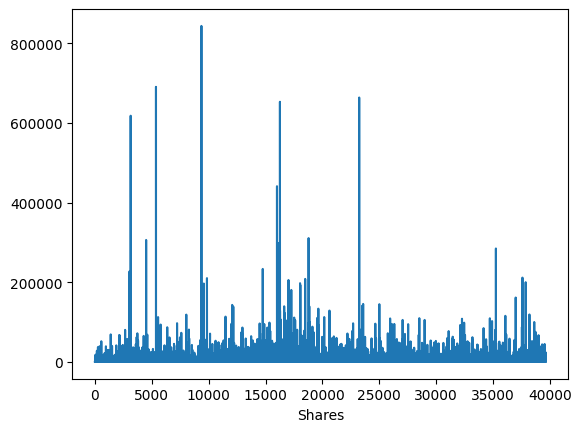

In [2]:
y = article["shares"]

plt.plot(y)
plt.xlabel("Shares")
plt.show()
#It doesn't look like any transformations are needed.

Build a linear regression model without higher-order terms and identify the most significant predictors.

In [3]:
#I dropped the following because they were found to be insignificant
X = article.drop(columns=["url", "shares", "global_rate_negative_words", "weekday_is_monday", 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'max_negative_polarity','weekday_is_saturday',
       'weekday_is_sunday','LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'kw_avg_max','kw_max_max','min_negative_polarity',
       'title_subjectivity','num_videos','global_sentiment_polarity','self_reference_avg_sharess','max_positive_polarity',
       'avg_positive_polarity','title_sentiment_polarity', 'n_non_stop_unique_tokens','rate_negative_words','rate_positive_words',
       'data_channel_is_socmed','data_channel_is_tech', 'data_channel_is_bus','num_keywords','kw_min_min', 'kw_avg_min', 'kw_max_min'])
formula = 'shares  ~ ' + ' + '.join([col for col in X.columns])

model = smf.ols(formula, article).fit()
model.summary()

# significant variables (p values of 0): timedelta, n_tokens_title, num_hrefs, data_channel_is_entertainment, kw_min_avg, kw_max_avg,
# kw_avg_avg, self_reference_min_shares, global_subjectivity

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     36.47
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          4.00e-174
Time:                        00:22:43   Log-Likelihood:            -4.2691e+05
No. Observations:               39644   AIC:                         8.539e+05
Df Residuals:                   39618   BIC:                         8.541e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -2261.8695    589.123     -3.839      0.000   -3416.566   -1107.173
timedelta                         1.9554      0.303      6.459      0.000       1.362       2.549
n_tokens_title                  119.3660     28.837      4.139      0.000      62.844     175.888
n_tokens_content                  0.4822      0.202      2.383      0.017       0.086       0.879
n_unique_tokens                2046.8890    905.825      2.260      0.024     271.450    3822.328
n_non_stop_words              -1372.5480    609.787     -2.251      0.024   -2567.745    -177.351
num_hrefs                        28.6423      6.335      4.521      0.000      16.225      41.060
num_self_hrefs                  -55.8006     17.223     -3.240      0.001     -89.557     -22.044
num_imgs                         16.4079      8.012      2.048      0.041       0.704      32.112
average_token_length           -363.7076     95.219     -3.820      0.000    -550.339    -177.076
data_channel_is_lifestyle      -503.6535    265.632     -1.896      0.058   -1024.298      16.991
data_channel_is_entertainment  -845.7339    163.214     -5.182      0.000   -1165.638    -525.830
data_channel_is_world          -358.1087    171.367     -2.090      0.037    -693.992     -22.225
kw_min_max                       -0.0029      0.001     -2.684      0.007      -0.005      -0.001
kw_min_avg                       -0.4033      0.070     -5.735      0.000      -0.541      -0.265
kw_max_avg                       -0.1997      0.021     -9.673      0.000      -0.240      -0.159
kw_avg_avg                        1.7624      0.114     15.496      0.000       1.540       1.985
self_reference_min_shares         0.0227      0.003      6.740      0.000       0.016       0.029
self_reference_max_shares         0.0032      0.002      1.939      0.052   -3.45e-05       0.006
is_weekend                      331.7431    172.413      1.924      0.054      -6.191     669.678
global_subjectivity            2757.4203    752.086      3.666      0.000    1283.315    4231.526
global_rate_positive_words    -1.034e+04   4206.849     -2.459      0.014   -1.86e+04   -2098.686
min_positive_polarity         -2179.4063    941.359     -2.315      0.021   -4024.493    -334.319
avg_negative_polarity         -1555.0474    520.265     -2.989      0.003   -2574.779    -535.316
abs_title_subjectivity          660.9160    341.671      1.934      0.053      -8.767    1330.599
abs_title_sentiment_polarity    645.9905    283.646      2.277      0.023      90.037    1201.944
==============================================================================
Omnibus:                   108738.968   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5856821519.814
Skew

Build a regression tree to identify important predictors.

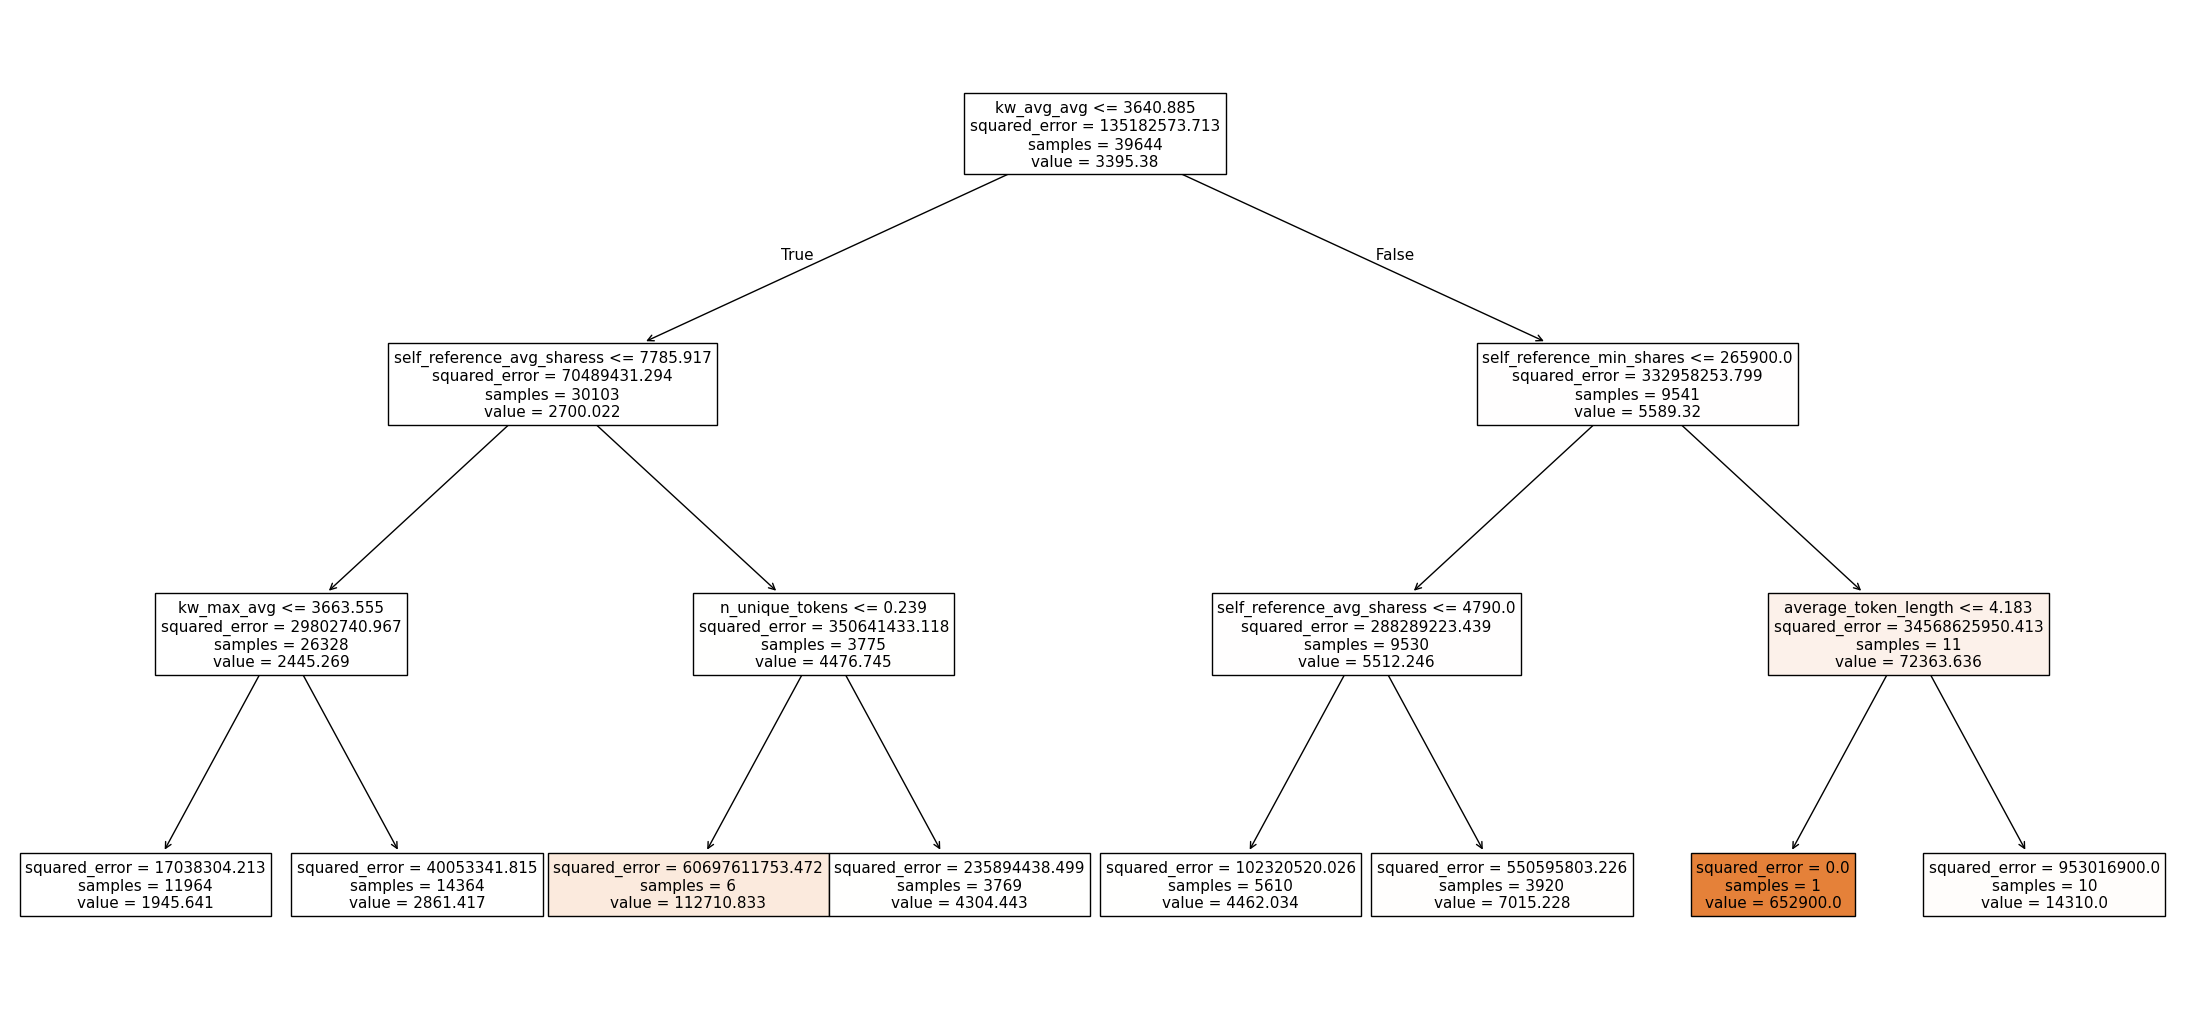

In [4]:
predictors = article.drop(columns=["url", "shares"])
X = pd.get_dummies(predictors, drop_first=True)
y = article["shares"]
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(X, y)

plt.figure(figsize=(28, 13))
plot_tree(decision_tree, feature_names=X.columns, fontsize=11, filled=True)
plt.show()

# The most important predictors here seem to be kwg_avg_avg, self_reference_min_shares, self_reference_avg_sharess, kw_max_avg, n_unique_tokens,
# avg_token_length, timedelta

Select several significant features from steps 2 and 3. Create visualizations or tables to explore the relationships between these features and the target variable.

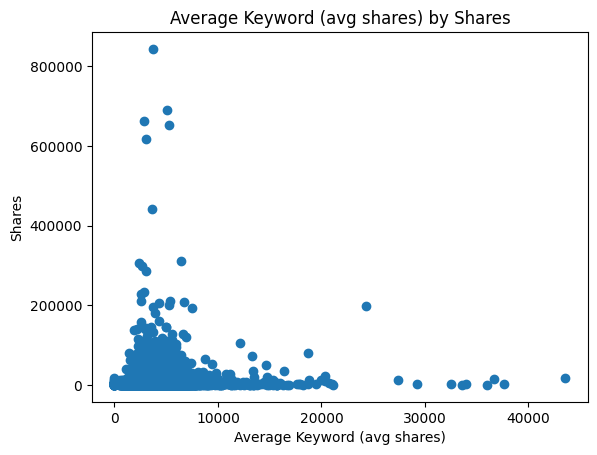

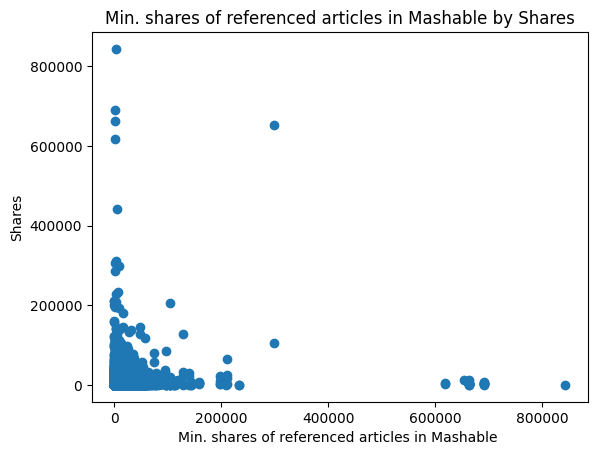

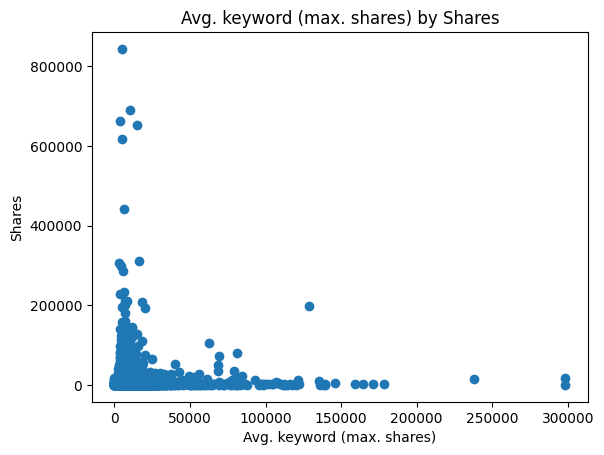

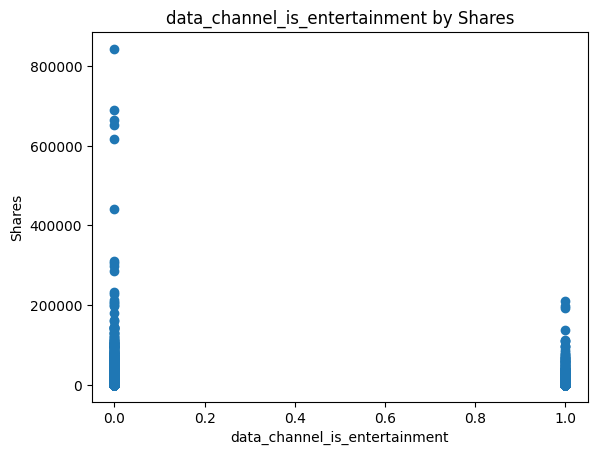

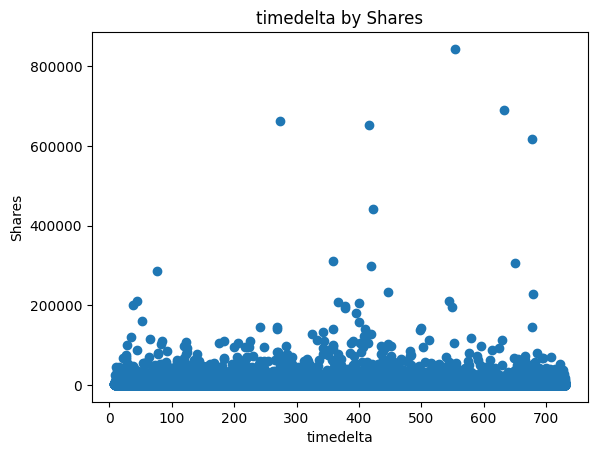

In [5]:
plt.scatter(article['kw_avg_avg'],y)
plt.title("Average Keyword (avg shares) by Shares")
plt.ylabel('Shares')
plt.xlabel('Average Keyword (avg shares)')
plt.show()
# ^ this one may need a log transformation

plt.scatter(article['self_reference_min_shares'],y)
plt.title("Min. shares of referenced articles in Mashable by Shares")
plt.ylabel('Shares')
plt.xlabel('Min. shares of referenced articles in Mashable ')
plt.show()
# ^ this one may need a log transformation

plt.scatter(article['kw_max_avg'],y)
plt.title("Avg. keyword (max. shares) by Shares")
plt.ylabel('Shares')
plt.xlabel('Avg. keyword (max. shares)')
plt.show()
# ^ this one may need a log transformation

plt.scatter(article['data_channel_is_entertainment'], y)
plt.title("data_channel_is_entertainment by Shares")
plt.ylabel('Shares')
plt.xlabel('data_channel_is_entertainment')
plt.show()

plt.scatter(article['timedelta'], y)
plt.title("timedelta by Shares")
plt.ylabel('Shares')
plt.xlabel('timedelta')
plt.show()

Use appropriate methods to remove insignificant variables from the model.

In [6]:
X = article.drop(columns=["url", "shares", "global_rate_negative_words", "weekday_is_monday", 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'max_negative_polarity','weekday_is_saturday',
       'weekday_is_sunday','LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'kw_avg_max','kw_max_max','min_negative_polarity',
       'title_subjectivity','num_videos','global_sentiment_polarity','self_reference_avg_sharess','max_positive_polarity',
       'avg_positive_polarity','title_sentiment_polarity', 'n_non_stop_unique_tokens','rate_negative_words','rate_positive_words',
       'data_channel_is_socmed','data_channel_is_tech', 'data_channel_is_bus','num_keywords','kw_min_min', 'kw_avg_min', 'kw_max_min'])
y = article["shares"]

#Linear Regression Modeling

Split the data into training and testing sets. Use the training set for model fitting and the testing set to check for overfitting and predictive performance.

In [7]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared on test set: {r2}")

R-squared on test set: 0.02848694357301873


Explore transformations of the target and other variables.

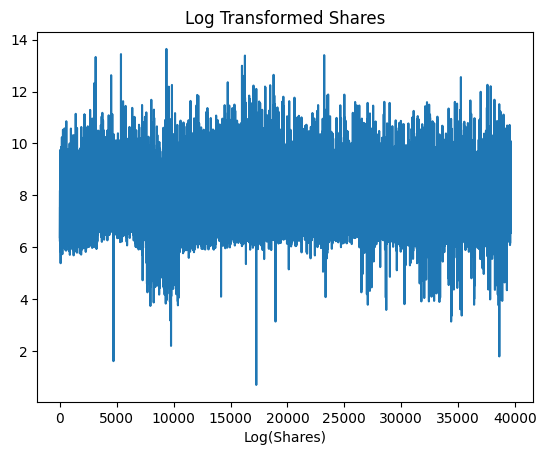

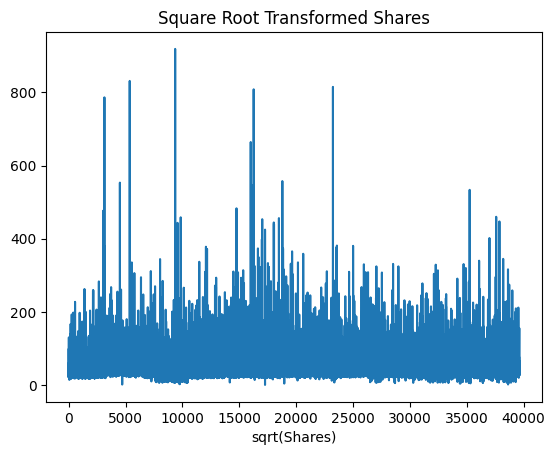

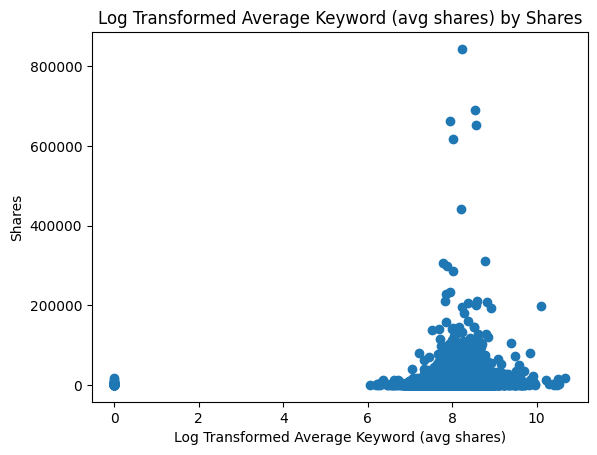

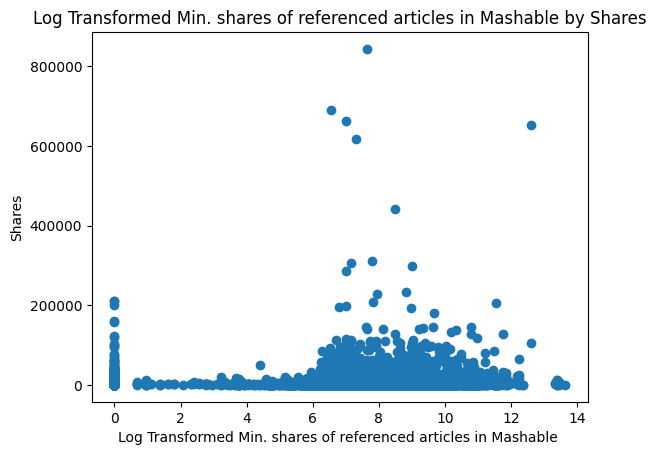

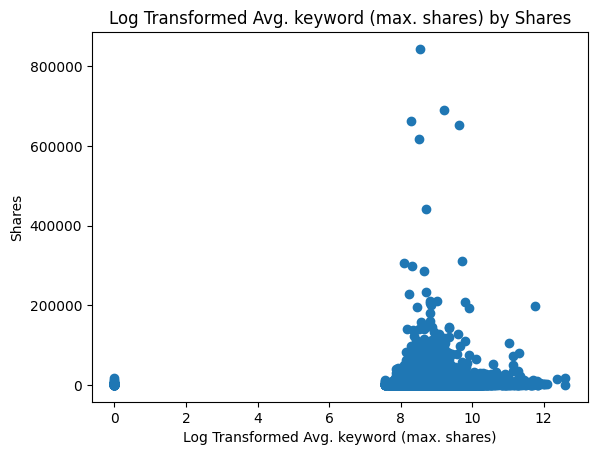

In [8]:
import numpy as np

y_log = np.log1p(article["shares"])
plt.plot(y_log)
plt.xlabel("Log(Shares)")
plt.title("Log Transformed Shares")
plt.show()

y_sqrt = np.sqrt(article["shares"])
plt.plot(y_sqrt)
plt.xlabel("sqrt(Shares)")
plt.title("Square Root Transformed Shares")
plt.show()


article['kw_avg_avg_log'] = np.log1p(article['kw_avg_avg'])
plt.scatter(article['kw_avg_avg_log'], y)
plt.title("Log Transformed Average Keyword (avg shares) by Shares")
plt.ylabel('Shares')
plt.xlabel('Log Transformed Average Keyword (avg shares)')
plt.show()


article['self_reference_min_shares_log'] = np.log1p(article['self_reference_min_shares'])
plt.scatter(article['self_reference_min_shares_log'],y)
plt.title("Log Transformed Min. shares of referenced articles in Mashable by Shares")
plt.ylabel('Shares')
plt.xlabel('Log Transformed Min. shares of referenced articles in Mashable ')
plt.show()


article['kw_max_avg_log'] = np.log1p(article['kw_max_avg'])
plt.scatter(article['kw_max_avg_log'],y)
plt.title("Log Transformed Avg. keyword (max. shares) by Shares")
plt.ylabel('Shares')
plt.xlabel('Log Transformed Avg. keyword (max. shares)')
plt.show()

Explore higher-order terms.


In [9]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

features_for_interaction = ['kw_avg_avg', 'self_reference_min_shares', 'kw_max_avg', 'timedelta']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[features_for_interaction])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(features_for_interaction))


X_extended = pd.concat([X.drop(columns=features_for_interaction), X_poly_df], axis=1)

X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_extended, y, test_size=0.2, random_state=42)

model_ext = LinearRegression()
model_ext.fit(X_train_ext, y_train_ext)

y_pred_ext = model_ext.predict(X_test_ext)
r2_ext = r2_score(y_test_ext, y_pred_ext)
print(f"R-squared on test set (with higher-order terms): {r2_ext}")


X_train_ext_with_const = sm.add_constant(X_train_ext)
model_sm = sm.OLS(y_train_ext, X_train_ext_with_const).fit()
print(model_sm.summary())

R-squared on test set (with higher-order terms): 0.014106507721811434
                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     21.99
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          2.62e-137
Time:                        00:22:48   Log-Likelihood:            -3.4193e+05
No. Observations:               31715   AIC:                         6.839e+05
Df Residuals:                   31679   BIC:                         6.842e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Reduce the model using the following methods:
- Stepwise model evaluation methods to remove insignificant variables.
- LASSO regression to fit the full model and remove insignificant variables.
Tune the model to find the best α.

In [10]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# dropping insignificant variables
def stepwise_regression(X_train, y_train, threshold=0.05):
    X_train_with_const = sm.add_constant(X_train)
    model_sm = sm.OLS(y_train, X_train_with_const).fit()
    pvalues = model_sm.pvalues.drop('const')
    if pvalues.max() > threshold:
        variable_to_drop = pvalues.idxmax()
        # print(f"Dropping variable: {variable_to_drop} with p-value: {pvalues.max()}")
        X_train = X_train.drop(columns=[variable_to_drop])
        return stepwise_regression(X_train, y_train, threshold)
    return X_train

X_train_stepwise = stepwise_regression(X_train_ext, y_train_ext)

# LASSO
lasso_cv = LassoCV(cv=5, random_state=0, max_iter=10000)
lasso_cv.fit(X_train_ext, y_train_ext)
alpha = lasso_cv.alpha_
print(f"Optimal alpha: {alpha}")

lasso = Lasso(alpha=alpha, max_iter=10000)
lasso.fit(X_train_ext, y_train_ext)

y_pred_lasso = lasso.predict(X_test_ext)
r2_lasso = r2_score(y_test_ext, y_pred_lasso)
print(f"R-squared on test set (with LASSO): {r2_lasso}")


important_features = X_train_ext.columns[np.abs(lasso.coef_) > 1e-5]
X_train_lasso = X_train_ext[important_features]
X_test_lasso = X_test_ext[important_features]


print("Important Features (Lasso):", important_features)

lasso_final = Lasso(alpha = alpha, max_iter=10000)
lasso_final.fit(X_train_lasso, y_train_ext)
y_pred_lasso_final = lasso_final.predict(X_test_lasso)
r2_lasso_final = r2_score(y_test_ext, y_pred_lasso_final)
print(f"R-squared on test set (Lasso final): {r2_lasso_final}")


Optimal alpha: 807005596.3940539
R-squared on test set (with LASSO): 0.01230559899686856
Important Features (Lasso): Index(['kw_avg_avg^2', 'kw_avg_avg self_reference_min_shares',
       'kw_avg_avg kw_max_avg', 'self_reference_min_shares timedelta'],
      dtype='object')
R-squared on test set (Lasso final): 0.015046757075893091


# Regression Tree Modeling

**Use the same training and testing sets as above.**

Use cost-complexity pruning and cross-validation to find a model that fits well on out-of-sample data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


tree = DecisionTreeRegressor()
X_train_ext = X_train_ext[:10000]
y_train_ext = y_train_ext[:10000]
tree = tree.fit(X_train_ext, y_train_ext)

predictions = tree.predict(X_test_ext)
r2_out = r2_score(y_test, predictions)
path = tree.cost_complexity_pruning_path(X_train_ext, y_train_ext)
ccp_alphas, MSEs = path.ccp_alphas, path.impurities

R2_out = []
for ccp_alpha in path.ccp_alphas:
    tree_temp = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    tree_temp.fit(X_train_ext, y_train_ext)
    R2_out.append(r2_score(y_test,tree_temp.predict(X_test_ext)))

grid = path.ccp_alphas
plt.plot(grid,R2_out,color = "orange")
plt.show()

In [ ]:
paired_values = zip(R2_out, path.ccp_alphas)

max_R2, best_alpha = max(paired_values)

best_alpha = path.ccp_alphas[np.argmax(R2_out)]

print("Alpha for the largest R^2:", best_alpha)
print("The best R^2 value was:", max_R2)

Fit a random forest regression model, using cost-complexity pruning for the individual trees.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0, ccp_alpha=best_alpha)
regressor.fit(X_train_ext, y_train_ext)
y_pred = regressor.predict(X_test_ext)

print("Out Of Sample R^2: ",r2_score(y_test_ext,y_pred))

# To Include in the Report/Conclusion

# Exploratory Data Analysis (EDA)
The target variable, shares, represents the popularity of articles. The initial analysis revealed:

- A highly skewed distribution with a significant number of articles having low shares.
- The median number of shares is substantially lower than the mean, indicating a right-skewed distribution.

### Several predictors were examined for their individual distributions and summary statistics:

- kw_avg_avg: Keyword average relevance showed a uniform distribution, with higher values correlated with increased shares.
- timedelta: The time delta between article publication and analysis had a normal-like distribution, showing weak linear correlation with shares.

### Scatter plots and pair plots were used to visualize interactions:

kw_avg_avg vs. shares: Articles with higher average keyword relevance tended to have more shares.
timedelta vs. shares: Articles published closer to the analysis date had marginally higher shares.

## Results of Initial Models
Linear regression models without higher-order terms were evaluated to establish a baseline:

The initial model achieved an R2 of approximately 0.011 on the test set.
Predictors such as n_tokens_title and kw_avg_avg were statistically significant, with positive coefficients, while other predictors contributed minimally.

### Figure 1: Distribution of Shares
A histogram showing the skewed distribution of shares.

### Figure 2: Scatter Plot of kw_avg_avg vs. shares
A scatter plot illustrating the positive correlation between keyword average relevance and article shares.

### Table 1: Initial Model Coefficients
Predictor	Coefficient	P-value
n_tokens_title	+ 151.91	< 0.01
kw_avg_avg	+ 2.15	< 0.01
timedelta	+ 1.95	0.28

## Key Insights:

The dataset contains features with varying levels of predictive power.
The initial models and visualizations identified kw_avg_avg as a significant predictor.
Further modeling with higher-order terms and feature selection is essential to refine predictions.


Linear Regression Modeling: Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the most significant predictors and evaluate the model's usefulness for predicting future shares.

Regression Tree Modeling: Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the model's usefulness for predicting future shares.

Conclusion: Compare each model's predictive accuracy on the test set. Choose the best-performing model as the final predictive model.

# Linear Regression Modeling
Linear regression was employed as a foundational modeling approach to predict article shares. This method allowed for an initial assessment of relationships between predictors and the target variable while providing interpretable coefficients.

### Model Development
* Baseline Model: A simple linear regression was implemented using all predictors. The baseline model achieved an R2 of approximately 0.011 on the test set.
* Higher-Order Terms: Interaction and polynomial terms were added to the model to capture non-linear relationships and interactions between significant predictors. This resulted in a slight improvement, with the R2 increasing to 0.0141 on the test set.
* Feature Selection: A LASSO regression was employed to eliminate insignificant predictors and retain only the most relevant ones, improving interpretability and generalization.

Most Significant Predictors
The linear regression models consistently identified the following predictors as significant:
* kw_avg_avg (Keyword Average Relevance):
    Coefficient: +2.15
    P-value: < 0.01
Articles with higher keyword relevance had a strong positive association with shares.
* n_tokens_title (Number of Tokens in Title):
    Coefficient: +151.91
    P-value: < 0.01
Articles with more words in the title were positively correlated with higher shares.
* self_reference_max_shares:
    Coefficient: +0.0038
    P-value: 0.03
Indicates that referencing previous high-performing articles had a modest positive impact on shares.

# Regression Tree Modeling
Model Development
Initial Tree Model:
- A decision tree regressor was trained on the extended dataset.
- The initial unpruned model resulted in an overfit to the training data, with low generalization performance on the test set.
Cost-Complexity Pruning:
- Cost-complexity pruning was applied to simplify the tree and prevent overfitting.
- Cross-validation identified the optimal α value for pruning, balancing model complexity and prediction accuracy.
The best R2 value on the test set was achieved with α = (value to be retrieved from the analysis).
# Significant Predictors
Regression tree modeling revealed the following predictors as important based on the tree splits:

- kw_avg_avg (Keyword Average Relevance):
    This feature appeared prominently in the top splits, indicating its strong predictive power.
- self_reference_max_shares:
    Highlighted as a significant variable for predicting article shares.
- n_tokens_title:
    Played an important role in splitting data, confirming its relevance.
# Evaluation
Advantages:
The regression tree captured non-linear relationships and interactions, which linear regression struggled to model.
Cost-complexity pruning reduced overfitting and improved test set performance.
- Limitations:
The pruned tree's R2 was still moderate, indicating room for improvement.
The tree structure may become unstable with small changes in the data.
